# Protocolo de codificación cuántica densa

### Importamos las herramientas necesarias:

In [1]:
import qiskit
from qiskit import *
from qiskit.visualization import plot_histogram
import matplotlib
%matplotlib inline

### Protocolo

El protocolo de codificación cuántica densa describe el proceso para codificar dos bits clásicos en un bit cuántico. Es decir, permite que la información de dos bits clásicos sea transmitida en un solo qubit.

Cabe destacar que el fenómeno clave para la construcción de este protocolo es el entrelazamiento cuántico.

In [2]:
# Bits clásicos que Alice desea enviar

c0 = 1
c1 = 0

In [3]:
# Definimos el circuito

qc = QuantumCircuit(2, 2)

In [4]:
# Alice y Bob entrelazan el par de qubits

qc.h(0)
qc.cx(0,1)

qc.barrier([0,1])

In [5]:
# Alice aplica las compuertas necesarias dependiendo de los bits que desea enviar

if c0 == 1:
    qc.z(0)

if c1 == 1:
    qc.x(0)
    
qc.barrier([0,1])

#Alice envía su qubit a Bob

In [7]:
# Bob desentrelaza los qubits

qc.cx(0,1)
qc.h(0)

qc.barrier([0,1])

In [9]:
# Medición de los qubits por parte de Bob

qc.measure([0,1],[0,1])

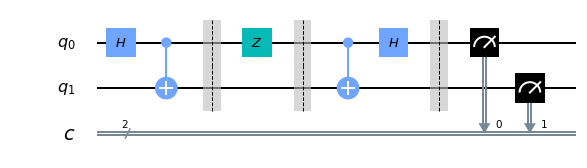

In [10]:
qc.draw(output = 'mpl')

In [12]:
# Ejecutamos el ciruito

qasm = Aer.get_backend('qasm_simulator')
job = execute(qc, qasm, shots=1000)
result = job.result()

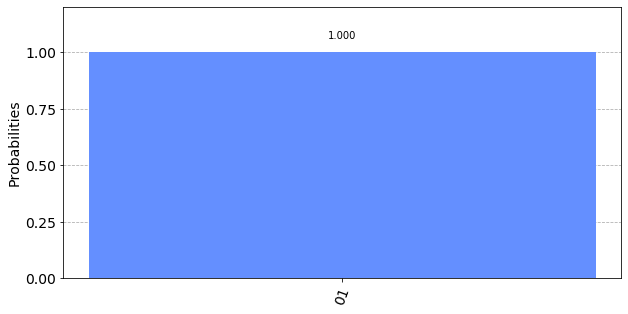

In [13]:
# Visualizamos en un histograma los posibles resultados de las mediciones

counts = result.get_counts(qc)
plot_histogram(counts,figsize=(10,5))